In [47]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score, precision_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
%matplotlib inline
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score

In [48]:
np.random.seed(0)

In [49]:
dataset = pd.read_csv('diabetes11.csv', sep=',', header =0)
print(len(dataset))
X = data.iloc[:, :-1]
y = data.iloc[:, -1]
df= pd.DataFrame(dataset)
df.head()

15000


,PatientID,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age,Diabetic
0,1354778,0,171,80,34,23,43.509726,1.213191,21,0
1,1147438,8,92,93,47,36,21.240576,0.158365,23,0
2,1640031,7,115,47,52,35,41.511523,0.079019,23,0
3,1883350,9,103,78,25,304,29.582192,1.282870,43,1
4,1424119,1,85,59,27,35,42.604536,0.549542,22,0


In [50]:
data.describe()

,PatientID,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age,Diabetic
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.502922e+06,3.224533,107.856867,71.220667,28.814000,137.852133,31.509646,0.398968,30.137733,0.333333
std,2.892534e+05,3.391020,31.981975,16.758716,14.555716,133.068252,9.759000,0.377944,12.089703,0.471420
min,1.000038e+06,0.000000,44.000000,24.000000,7.000000,14.000000,18.200512,0.078044,21.000000,0.000000
25%,1.252866e+06,0.000000,84.000000,58.000000,15.000000,39.000000,21.259887,0.137743,22.000000,0.000000
50%,1.505508e+06,2.000000,104.000000,72.000000,31.000000,83.000000,31.767940,0.200297,24.000000,0.000000
75%,1.755205e+06,6.000000,129.000000,85.000000,41.000000,195.000000,39.259692,0.616285,35.000000,1.000000
max,1.999997e+06,14.000000,192.000000,117.000000,93.000000,799.000000,56.034628,2.301594,77.000000,1.000000


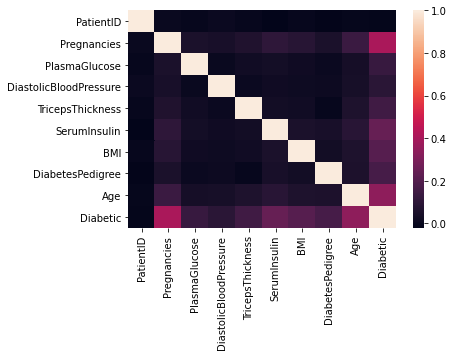

In [51]:
sns.heatmap(data.corr())

In [60]:
df['is_train']=np.random.uniform(0,1,len(df)) <=0.75 #train size 75%
df.head()

,PatientID,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age,Diabetic,is_train
0,1354778,0,171,80,34,23,43.509726,1.213191,21,0,True
1,1147438,8,92,93,47,36,21.240576,0.158365,23,0,True
2,1640031,7,115,47,52,35,41.511523,0.079019,23,0,True
3,1883350,9,103,78,25,304,29.582192,1.282870,43,1,True
4,1424119,1,85,59,27,35,42.604536,0.549542,22,0,False


In [61]:
#creating dataframes with test and training rows
train, test= df[df['is_train']== True],df[df['is_train']== False]
print("Observations in training data : ",len(train))
print("Observations in training data : ",len(test))

Observations in training data :  11204
Observations in training data :  3796


In [62]:
features= df.columns[:-1]
features

Index(['PatientID', 'Pregnancies', 'PlasmaGlucose', 'DiastolicBloodPressure',
       'TricepsThickness', 'SerumInsulin', 'BMI', 'DiabetesPedigree', 'Age',
       'Diabetic'],
      dtype='object')

In [63]:
y_c=pd.factorize(train['Diabetic'])[0]
y_c

array([0, 0, 0, ..., 1, 0, 1], dtype=int64)

In [64]:
rf_clf = RandomForestClassifier(n_jobs=2, random_state=0)
#training classifier
rf_clf.fit(train[features],y_c)

RandomForestClassifier(n_jobs=2, random_state=0)

In [65]:
rf_clf.predict(test[features])

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [66]:
#to view predicted probabilities of first 10 observations
rf_clf.predict_proba(test[features])[0:10]

array([[1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [0.  , 1.  ],
       [0.  , 1.  ],
       [1.  , 0.  ],
       [0.99, 0.01]])

In [68]:
rf_clf_pred_train = cross_val_predict(rf_clf, X, y_c, cv = 3)
print('precision_score : ',precision_score(y_c, rf_clf_pred_train ))
print('recall_score : ',recall_score(y_c, rf_clf_pred_train))
print('f1_score ',f1_score(y, y_pred))

ValueError: Found input variables with inconsistent numbers of samples: [15000, 11204]